# comparison of the susie_RSS analysis with the new and old GWAS sumstat

## Data Gen
### Command with Feb GWAS input

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/ \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_2/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

### Command with Sept GWAS input

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_3/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

In [4]:
library("tidyverse")
library("mvsusieR")

In [17]:
a = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_old <- a$variable_names[unlist(a$sets$cs)]
input_old = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_old = (input_old$bhat/input_old$sbhat)%>%as_tibble%>%mutate(snps = input_old$snps)

b =  readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_3/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_new <- b$variable_names[unlist(b$sets$cs)]
input_new = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_new = (input_new$bhat/input_new$sbhat)%>%as_tibble%>%mutate(snps = input_new$snps)

## Result

### CS
#### Feb

In [18]:
(Z_old%>%filter(snps%in%cs_old))
(Z_old%>%filter(snps%in%cs_new))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.4471082,-0.25943365,-1.4992419,-1.415560,1:207679187_G_GA
3.5841530,10.34850514,4.8216895,4.682759,1:207739127_A_G
-3.4142184,-6.89021654,-2.5802309,NA,1:207760773_C_T
0.1396908,0.80908316,0.4892455,-1.404372,1:207762674_A_G
-0.2980362,-3.68948160,-2.2502018,-2.613924,1:207764844_G_GA
0.1145730,0.01665601,-0.3747902,-2.337838,1:207785433_A_ACT
3.4392377,10.26235302,4.7276222,-4.569444,1:207786152_A_G
3.4316938,10.24248088,4.7378172,-4.541667,1:207786223_A_C
4.0488021,11.83270986,5.4917236,7.965909,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.174287611,0.7786918,0.3509238,NA,1:207773991_C_T
0.004430121,0.7154017,0.5363334,1.377049,1:207774882_A_G
0.141306691,0.8489449,0.3424352,2.184971,1:207782931_A_G
-0.028084693,0.7386847,0.5955635,NA,1:207783507_C_T


#### Sept


In [19]:
(Z_new%>%filter(snps%in%cs_old))
(Z_new%>%filter(snps%in%cs_new))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.5841530,10.3485051,4.8216895,5.827022,1:207739127_A_G
-3.4142184,-6.8902165,-2.5802309,1.969618,1:207760773_C_T
0.1396908,0.8090832,0.4892455,-1.460930,1:207762674_A_G
3.4392377,10.2623530,4.7276222,-6.043853,1:207786152_A_G
3.4316938,10.2424809,4.7378172,-6.033582,1:207786223_A_C
4.0488021,11.8327099,5.4917236,10.051859,1:207786289_A_G
3.4552060,10.4245846,4.9798055,6.849373,1:207789269_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.174287611,0.7786918,0.3509238,-2.427934,1:207773991_C_T
0.004430121,0.7154017,0.5363334,1.555722,1:207774882_A_G
0.141306691,0.8489449,0.3424352,2.450956,1:207782931_A_G
-0.028084693,0.7386847,0.5955635,1.603948,1:207783507_C_T


### Plot
#### Feb

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 9 height: 2.8 


$plot

$width
[1] 9

$height
[1] 2.8


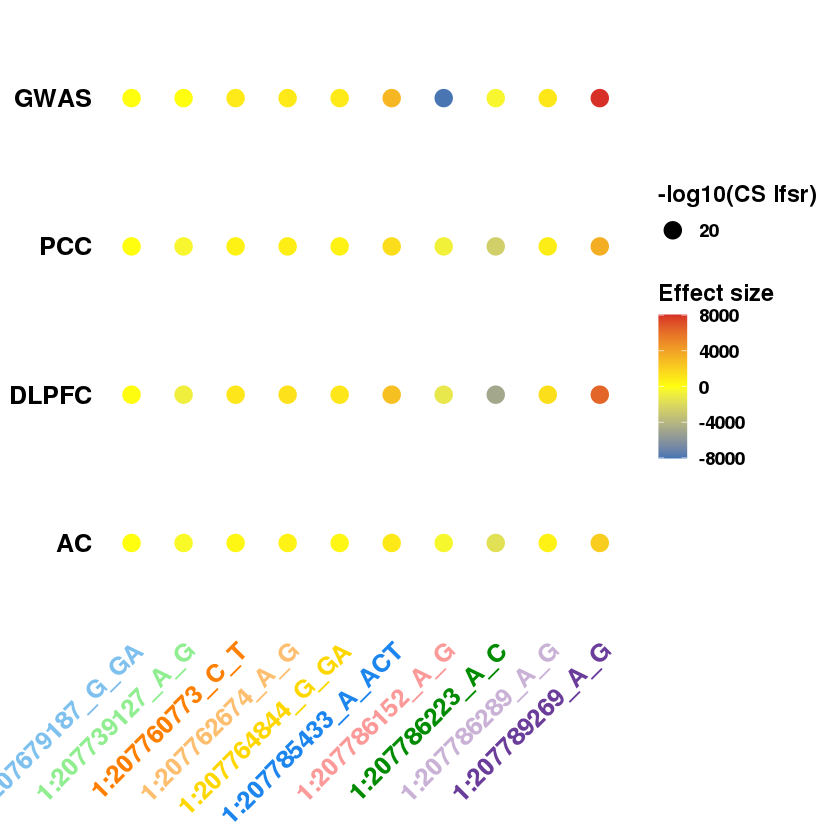

In [5]:
a %>% mvsusie_plot()

#### Sept

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 5.4 height: 2.8 


$plot

$width
[1] 5.4

$height
[1] 2.8


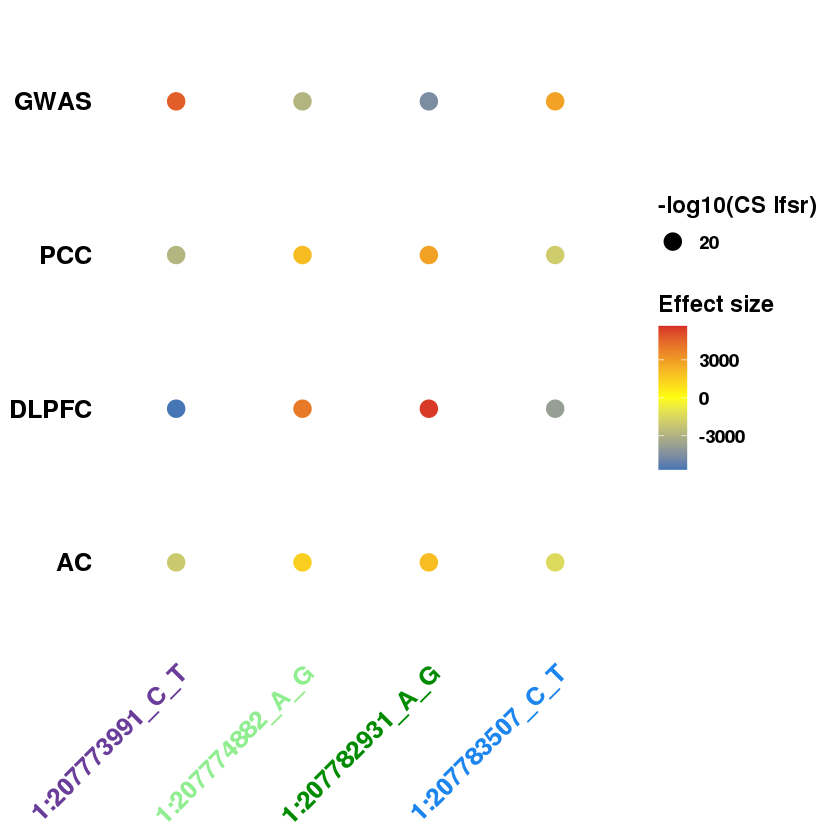

In [20]:
b %>% mvsusie_plot()

In [ ]:
### Todo, try merge the gene with allele flip and do it again!!